<a href="https://colab.research.google.com/github/Manav0702/ESDproject/blob/main/Copy_of_Food_Nutrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
df=pd.read_csv('nutrients_csvfile.csv')

In [ ]:
print(df.to_string())

                                         Food        Measure  Grams Calories Protein  Fat Sat.Fat  Fiber Carbs                          Category
0                                  Cows' milk          1 qt.    976      660      32   40      36      0    48                    Dairy products
1                                   Milk skim          1 qt.    984      360      36    t       t      0    52                    Dairy products
2                                  Buttermilk          1 cup    246      127       9    5       4      0    13                    Dairy products
3                       Evaporated, undiluted          1 cup    252      345      16   20      18      0    24                    Dairy products
4                              Fortified milk         6 cups  1,419    1,373      89   42      23    1.4   119                    Dairy products
5                               Powdered milk          1 cup    103      515      27   28      24      0    39                    

In [ ]:
df.shape

(335, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [ ]:
df.describe()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
count,335,335,335,334,335,335,333,335,335,335
unique,329,61,103,152,40,45,38,57,80,16
top,Butter,1 cup,100,100,1,t,0,0,0,"Breads, cereals, fastfood,grains"
freq,3,120,38,14,53,115,174,116,45,45


In [ ]:
df.isnull().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

In [ ]:
df.dropna()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
...,...,...,...,...,...,...,...,...,...,...
330,Fruit-flavored soda,12 oz.,346,161,0,0,0,0,42,"Drinks,Alcohol, Beverages"
331,Ginger ale,12 oz.,346,105,0,0,0,0,28,"Drinks,Alcohol, Beverages"
332,Root beer,12 oz.,346,140,0,0,0,0,35,"Drinks,Alcohol, Beverages"
333,Coffee,1 cup,230,3,t,0,0,0,1,"Drinks,Alcohol, Beverages"


In [ ]:
df['Grams'] = pd.to_numeric(df['Grams'], errors='coerce').astype('Int64')
df['Calories'] = pd.to_numeric(df['Calories'], errors='coerce').astype('Int64')
df['Protein'] = pd.to_numeric(df['Protein'], errors='coerce').astype('Int64')
df['Fiber'] = pd.to_numeric(df['Fiber'], errors='coerce').astype('float64')
df['Fat'] = pd.to_numeric(df['Fat'], errors='coerce').astype('Int64')
df['Sat.Fat'] = pd.to_numeric(df['Sat.Fat'], errors='coerce').astype('Int64')

In [ ]:
df.isnull().sum()

Food          0
Measure       0
Grams         1
Calories      5
Protein      39
Fat         116
Sat.Fat      17
Fiber        27
Carbs         0
Category      0
dtype: int64

In [ ]:
df=df.dropna()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176 entries, 0 to 332
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      176 non-null    object 
 1   Measure   176 non-null    object 
 2   Grams     176 non-null    Int64  
 3   Calories  176 non-null    Int64  
 4   Protein   176 non-null    Int64  
 5   Fat       176 non-null    Int64  
 6   Sat.Fat   176 non-null    Int64  
 7   Fiber     176 non-null    float64
 8   Carbs     176 non-null    object 
 9   Category  176 non-null    object 
dtypes: Int64(5), float64(1), object(4)
memory usage: 16.0+ KB


In [ ]:
df.describe()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.00000
mean,135.704545,220.721591,12.420455,13.909091,10.664773,3.36483
std,125.479666,149.636080,21.787400,24.522007,23.813948,21.52410
min,12.000000,0.000000,-1.000000,0.000000,0.000000,0.00000
25%,63.750000,112.250000,3.000000,2.000000,0.000000,0.00000
50%,100.000000,185.000000,7.000000,9.000000,5.000000,0.00000
75%,192.500000,285.000000,17.000000,14.000000,11.000000,0.90000
max,976.000000,992.000000,232.000000,233.000000,234.000000,235.00000


In [ ]:
df['status'] = np.where((df['Calories']<=200) & (df['Protein']<=40) & (df['Sat.Fat']<=15) & (df['Fat']<=20) & (df['Fiber']<=1.0), "Healthy", "Unhealthy")

In [ ]:
df.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category,status
0,Cows' milk,1 qt.,976,660,32,40,36,0.0,48,Dairy products,Unhealthy
2,Buttermilk,1 cup,246,127,9,5,4,0.0,13,Dairy products,Healthy
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0.0,24,Dairy products,Unhealthy
5,Powdered milk,1 cup,103,515,27,28,24,0.0,39,Dairy products,Unhealthy
8,Goats' milk,1 cup,244,165,8,10,8,0.0,11,Dairy products,Healthy


In [ ]:
df.status.value_counts()

Unhealthy    95
Healthy      81
Name: status, dtype: int64

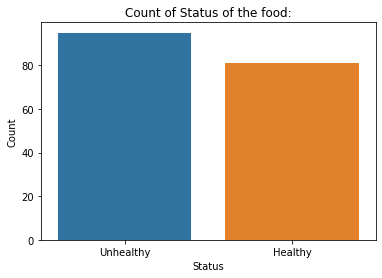

In [ ]:
sns.barplot(x=['Unhealthy', 'Healthy'], y=[df.status.value_counts()[0], df.status.value_counts()[1]])
plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Count of Status of the food:")
plt.show()

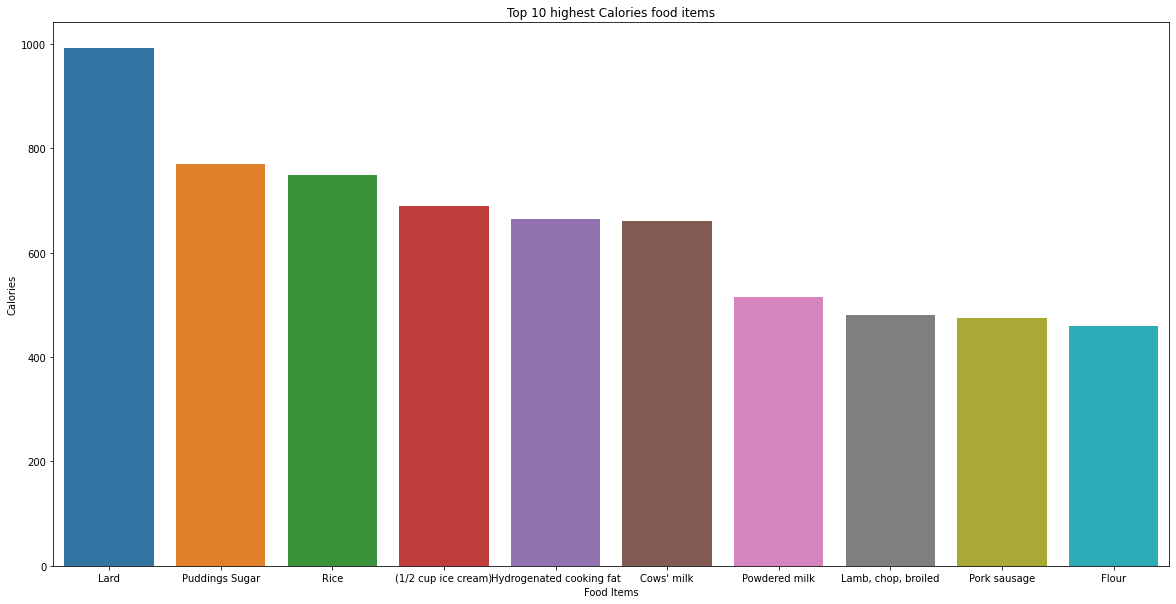

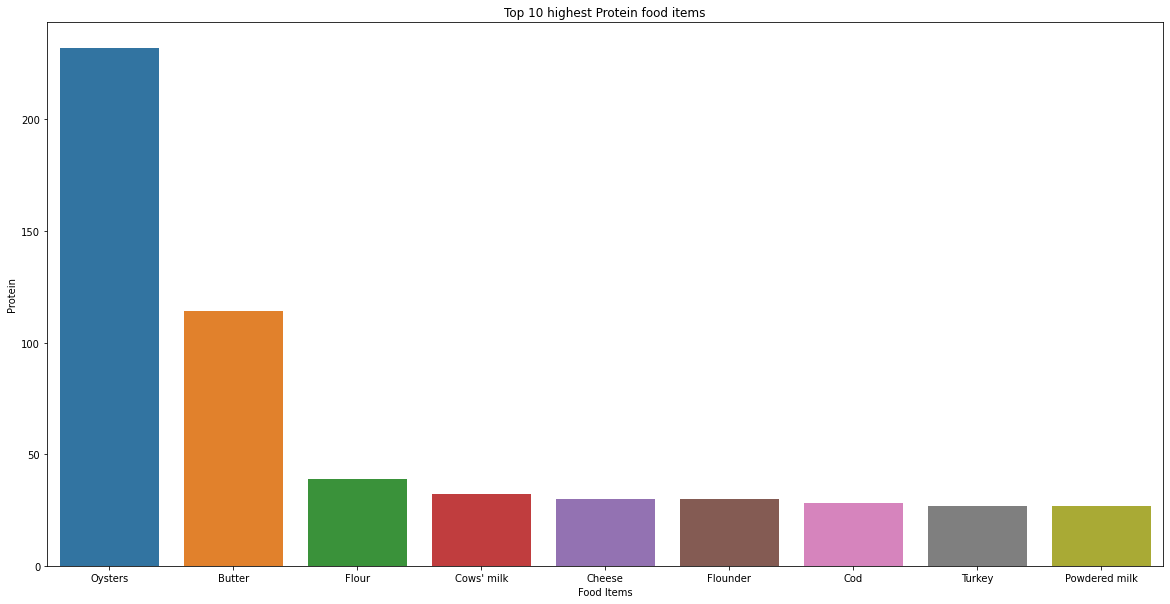

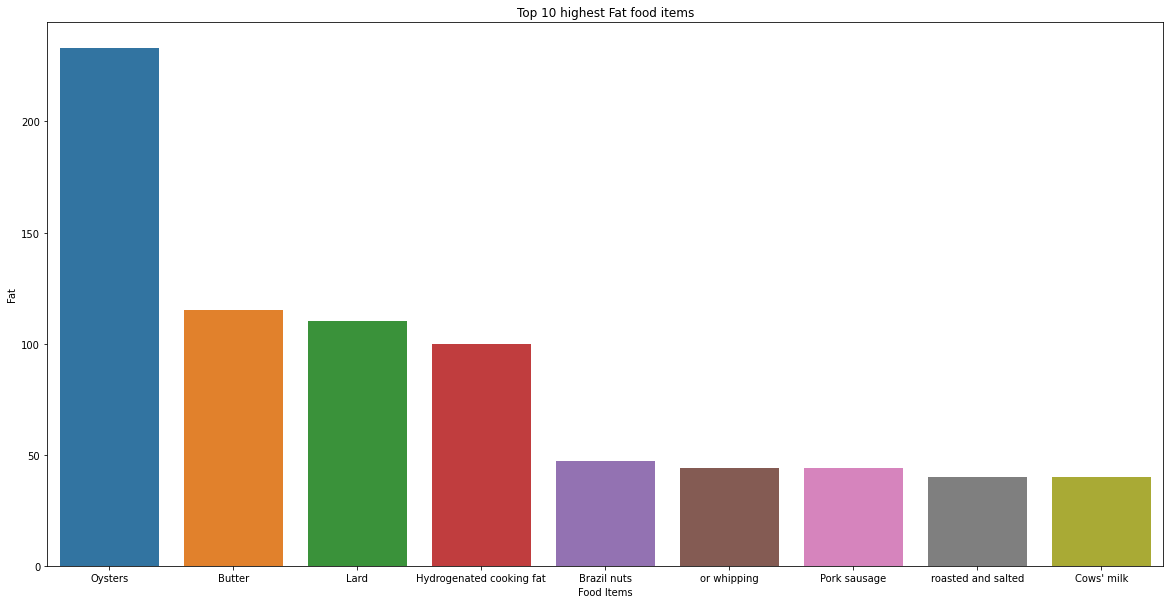

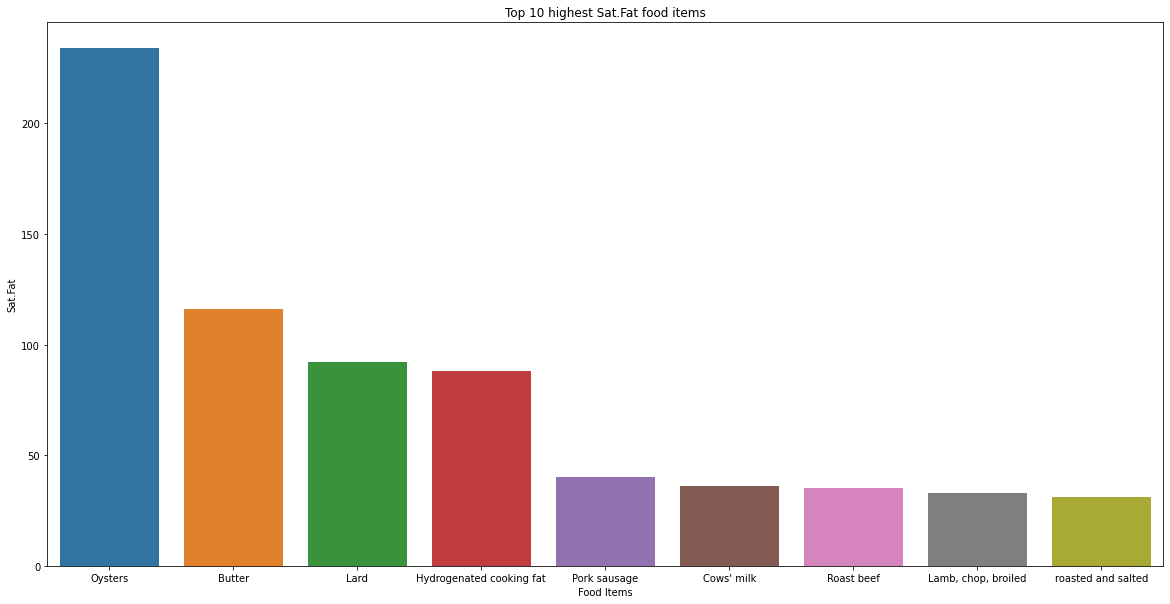

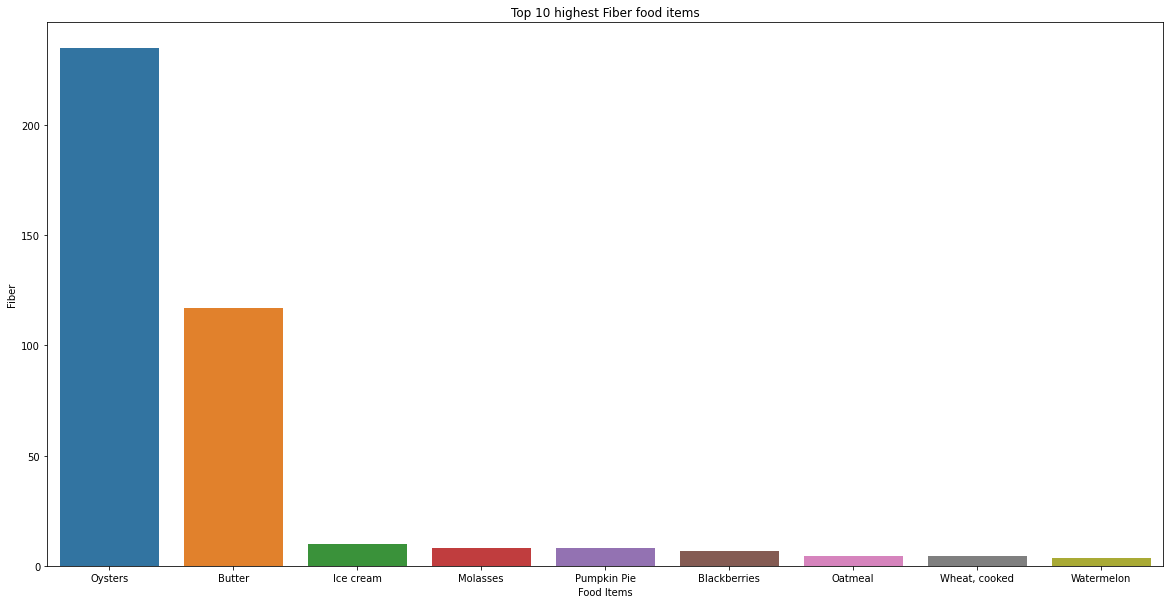

In [45]:
def fun(l):
  for x in l:
    plt.figure(figsize=(20,10))
    cal1=df.sort_values(by=x,ascending=False)
    cal10=cal1.head(10)
    sns.barplot(x=cal10.Food, y=cal10[x])
    plt.xlabel("Food Items")
    plt.ylabel(x)
    plt.title("Top 10 highest "+x+" food items")
    plt.show()
l=['Calories','Protein','Fat','Sat.Fat','Fiber']
fun(l)

In [ ]:
l=LabelEncoder()
df.status=l.fit_transform(df.status)

In [ ]:
print(df.head())

                    Food Measure  Grams  Calories  Protein  Fat  Sat.Fat  \
0             Cows' milk   1 qt.    976       660       32   40       36   
2             Buttermilk   1 cup    246       127        9    5        4   
3  Evaporated, undiluted   1 cup    252       345       16   20       18   
5          Powdered milk   1 cup    103       515       27   28       24   
8            Goats' milk   1 cup    244       165        8   10        8   

   Fiber Carbs        Category  status  
0    0.0    48  Dairy products       1  
2    0.0    13  Dairy products       0  
3    0.0    24  Dairy products       1  
5    0.0    39  Dairy products       1  
8    0.0    11  Dairy products       0  


In [ ]:
df.Category.value_counts()

Breads, cereals, fastfood,grains    27
Meat, Poultry                       26
Dairy products                      23
Fish, Seafood                       18
Desserts, sweets                    18
Seeds and Nuts                      12
Soups                               10
Vegetables R-Z                       9
Fats, Oils, Shortenings              8
Drinks,Alcohol, Beverages            7
Jams, Jellies                        5
Fruits G-P                           4
Vegetables A-E                       3
Fruits A-F                           3
Vegetables F-P                       2
Fruits R-Z                           1
Name: Category, dtype: int64

In [ ]:
df.Category=l.fit_transform(df.Category)

In [ ]:
df.corr()

,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Category,status
Grams,1.000000,0.169278,0.046239,-0.006897,0.035499,0.043444,-0.052523,0.167919
Calories,0.169278,1.000000,0.075304,0.380467,0.311857,-0.040181,-0.083585,0.619261
Protein,0.046239,0.075304,1.000000,0.786297,0.809137,0.910615,0.011867,0.170039
Fat,-0.006897,0.380467,0.786297,1.000000,0.978772,0.806774,0.042914,0.328039
Sat.Fat,0.035499,0.311857,0.809137,0.978772,1.000000,0.853729,0.025633,0.286046
Fiber,0.043444,-0.040181,0.910615,0.806774,0.853729,1.000000,-0.027674,0.138384
Category,-0.052523,-0.083585,0.011867,0.042914,0.025633,-0.027674,1.000000,0.050083
status,0.167919,0.619261,0.170039,0.328039,0.286046,0.138384,0.050083,1.000000


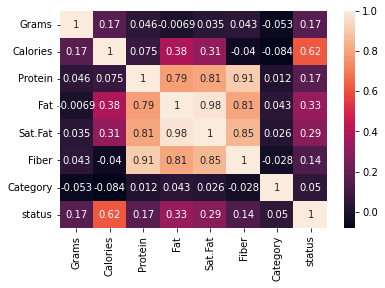

In [ ]:
sns.heatmap(df.corr(), annot=True)


In [ ]:
from sklearn.model_selection import train_test_split
y=df.status
x=df.drop(['status','Measure','Food','Carbs' ],axis=1)


In [ ]:
x_train, x_test, y_train, y_test=train_test_split(x, y,test_size=0.2,random_state=1)


In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 140 entries, 170 to 49
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Grams     140 non-null    Int64  
 1   Calories  140 non-null    Int64  
 2   Protein   140 non-null    Int64  
 3   Fat       140 non-null    Int64  
 4   Sat.Fat   140 non-null    Int64  
 5   Fiber     140 non-null    float64
 6   Category  140 non-null    int64  
dtypes: Int64(5), float64(1), int64(1)
memory usage: 9.4 KB


In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)
p=model.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
print(p)


[1 0 0 0 1 1 1 1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 1 0 1]


In [ ]:
print(y_test)

201    1
266    0
24     0
85     0
68     1
277    1
244    0
18     1
317    1
236    0
15     1
8      0
239    0
57     1
267    0
259    1
303    1
47     1
264    0
43     0
66     0
96     1
327    0
89     0
55     0
149    1
62     1
38     0
21     1
233    1
308    0
313    1
302    1
9      1
309    0
172    1
Name: status, dtype: int64


In [ ]:
from sklearn.metrics import precision_score
print(precision_score(y_test,p))

0.8636363636363636
